In [40]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("/home/aditya/Downloads/examples/diabetes.csv", header=None, names=col_names)

In [41]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
feature_cols = ['pregnant', 'glucose', 'bp', 'insulin','bmi','age','pedigree']
X = pima[feature_cols]
y = pima.label

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

In [6]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]])

Text(0.5, 257.44, 'Predicted label')

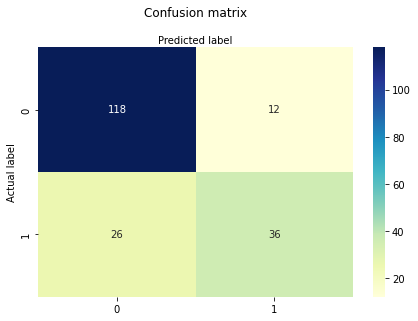

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


/home/aditya/.local/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


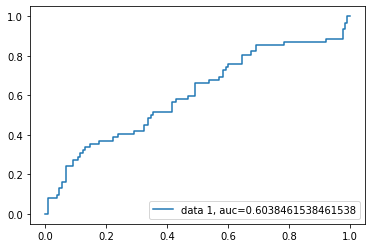

     pregnant  glucose  bp  insulin   bmi  age  pedigree
661         1      199  76        0  42.9   22     1.394
122         2      107  74      100  33.6   23     0.404
113         4       76  62        0  34.0   25     0.391
14          5      166  72      175  25.8   51     0.587
529         0      111  65        0  24.6   31     0.660
..        ...      ...  ..      ...   ...  ...       ...
366         6      124  72        0  27.6   29     0.368
301         2      144  58      135  31.6   25     0.422
382         1      109  60      182  25.4   21     0.947
140         3      128  78        0  21.1   55     0.268
463         5       88  78        0  27.6   37     0.258

[192 rows x 7 columns]
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [45]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print(X_test)
print(y_pred)

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
dataset = pd.read_csv('/home/aditya/Downloads/examples/User_Data.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [67]:
x = dataset.iloc[:, [2, 3]].values

y = dataset.iloc[:, 4].values

In [68]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
		x, y, test_size = 0.25, random_state = 0)
		

In [71]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print (xtrain[0:10, :])


[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [72]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest)

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[65  3]
 [ 8 24]]


In [74]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
print("Accuracy : ", accuracy_score(ytest, y_pred))
print("ReCall : ", recall_score(ytest, y_pred))
print("Precision  : ", precision_score(ytest, y_pred))

Accuracy :  0.89
ReCall :  0.75
Precision  :  0.8888888888888888


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


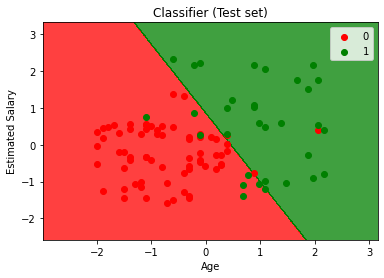

In [28]:
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
							stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
							stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
			np.array([X1.ravel(), X2.ravel()]).T).reshape(
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green'))(i), label = j)
	
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


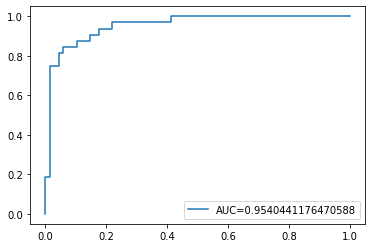

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [76]:
y_pred_proba = classifier.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

print(y_pred)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('/home/aditya/Downloads/examples/logreg.csv')
dataset

,X1,X2,Y
0,2.781084,2.550537e+00,0
1,1.465489,2.362125e+00,0
2,3.396562,4.400294e+00,0
3,1.388070,1.850220e+00,0
4,3.064072,5.305973e+06,0
5,7.627531,2.759262e+00,1
6,5.332441,2.088627e+00,1
7,6.922597,1.771064e+00,1
8,8.675419,-2.420687e-01,1
9,7.673756,3.508563e+00,1


In [5]:
x = dataset.iloc[:, [0, 1]].values
  
y = dataset.iloc[:, 2].values

In [2]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
		x, y, test_size = 0.25, random_state = 0)

NameError: name 'x' is not defined

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print (xtrain[0:10, :])

[[ 1.12144738  1.96527255]
 [-1.25297108 -0.09110044]
 [ 0.22598622 -0.58167607]
 [ 0.83415826 -1.15129102]
 [-1.28258087 -1.00930724]
 [-0.74980793  0.24685523]
 [ 1.10376803  0.621247  ]]


In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest)

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1 1]
 [0 1]]


In [10]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
print("Accuracy : ", accuracy_score(ytest, y_pred))
print("ReCall : ", recall_score(ytest, y_pred))
print("Precision  : ", precision_score(ytest, y_pred))

Accuracy :  0.6666666666666666
ReCall :  1.0
Precision  :  0.5


In [1]:
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
							stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
							stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
			np.array([X1.ravel(), X2.ravel()]).T).reshape(
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green'))(i), label = j)
	
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

NameError: name 'xtest' is not defined